In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("car_price_dataset.csv")
data.head(5)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [4]:
y = data["Price"]
X = data.drop("Price", axis=1)
X.shape

(10000, 9)

In [5]:
print(X.isna().sum()) # all 0
print("________________________")
print(y.isna().sum()) # all 0

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
dtype: int64
________________________
0


In [6]:
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(X[["Brand", "Model", "Fuel_Type", "Transmission"]])
feature_names = encoder.get_feature_names_out(["Brand", "Model", "Fuel_Type", "Transmission"])
encoded_df = pd.DataFrame(encoded_array, columns=feature_names)
X_encod = pd.concat([X.drop(["Brand", "Model", "Fuel_Type", "Transmission"], axis=1), encoded_df], axis=1)
X_encod.head(5)

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2012,2.0,5356,2,3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2020,4.2,231440,4,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2023,2.0,160971,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2003,2.6,286618,3,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [7]:
corr = X_encod.corrwith(y)
corr.sort_values()

Mileage                       -0.551227
Fuel_Type_Petrol              -0.141650
Fuel_Type_Diesel              -0.136894
Transmission_Semi-Automatic   -0.133073
Transmission_Manual           -0.112186
Brand_Honda                   -0.020167
Model_Civic                   -0.020108
Brand_BMW                     -0.015938
Model_X5                      -0.015637
Model_5 Series                -0.011293
Model_RAV4                    -0.009928
Model_Camry                   -0.008223
Brand_Hyundai                 -0.007976
Model_Accord                  -0.006829
Model_CR-V                    -0.006773
Model_Sonata                  -0.006540
Brand_Toyota                  -0.005768
Model_Golf                    -0.005280
Model_Focus                   -0.004754
Model_Rio                     -0.004749
Model_Tucson                  -0.003786
Model_Elantra                 -0.003076
Model_Explorer                -0.002871
Brand_Ford                    -0.000043
Model_3 Series                 0.000107


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encod, y, test_size=0.3, random_state=52)

In [9]:
scaler = StandardScaler()   

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

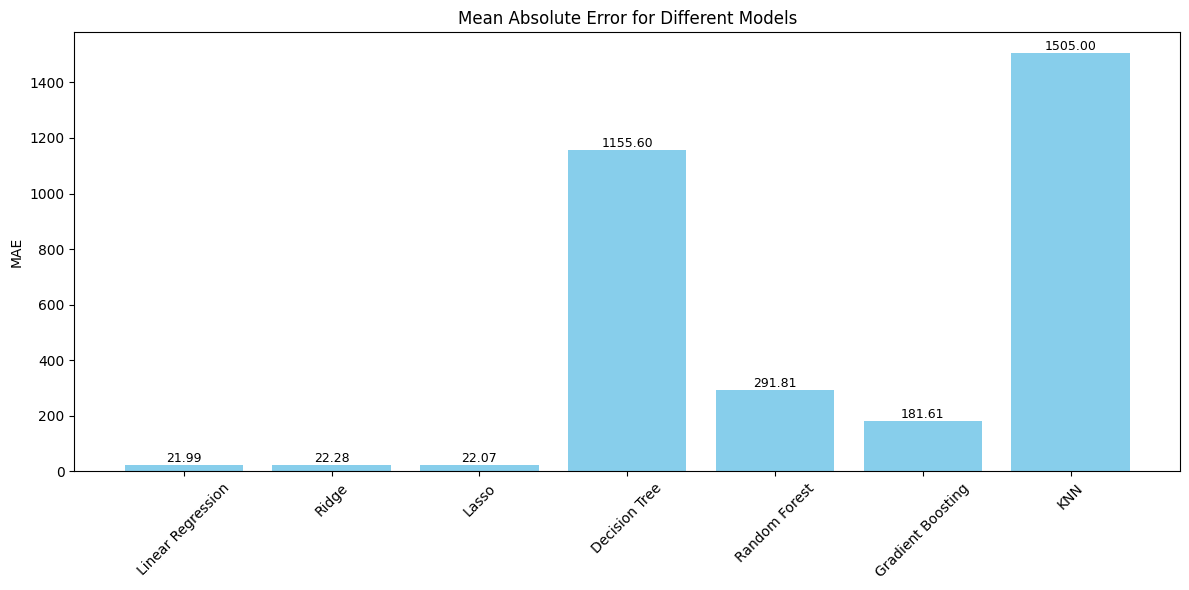

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

mae_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae_scores[name] = mean_absolute_error(y_test, y_pred)  

plt.figure(figsize=(12, 6))
bars = plt.bar(mae_scores.keys(), mae_scores.values(), color="skyblue")
plt.ylabel("MAE")
plt.title("Mean Absolute Error for Different Models")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()